In [20]:
!pip install git+https://github.com/AAMIASoftwares-research/HCATNetwork.git@google-colab
!pip install git+https://github.com/AAMIASoftwares-research/DatasetUtilities.git@google-colab


  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-3mvxxm_u
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commit e94413cce5e4fad1a00a771112bf7e66e3501d4d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-3mvxxm_u'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


  Cloning https://github.com/AAMIASoftwares-research/DatasetUtilities.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-_2i2x32v
  Resolved https://github.com/AAMIASoftwares-research/DatasetUtilities.git to commit 9a1e327a6fc6b40b6191996c9bc01da4981de7c2
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-install-72eq0g6z\hcatnetwork_eddcaf3f0be84e128ef0d6c3ed4e39ca
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commi

  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/DatasetUtilities.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-_2i2x32v'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'
  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-install-72eq0g6z\hcatnetwork_eddcaf3f0be84e128ef0d6c3ed4e39ca'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


In [21]:
import hcatnetwork
import HearticDatasetManager

In [22]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
%matplotlib inline
# from google.colab import drive
# drive.mount('/content/drive')

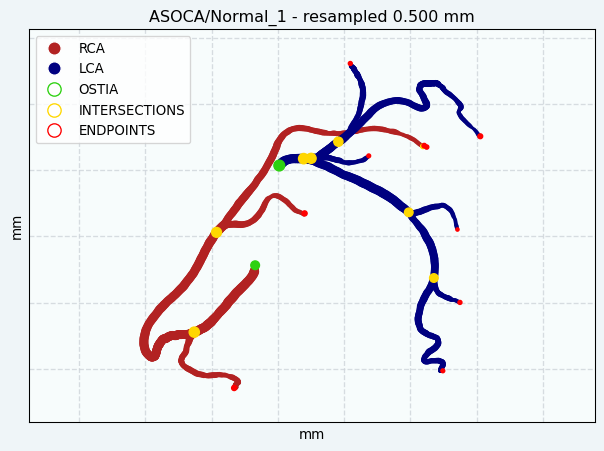

In [23]:
# Get file names
cat08_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/CAT08"
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_GRAPHS
cat08_graph_file = os.path.join(
    cat08_dataset_folder,
    DATASET_CAT08_GRAPHS[0]
)

asoca_dataset_folder = "C:/Users/zaira/Documents/uni/HIGH_PERFORMANCE_COMPUTING/Neuroengineering/project/heart_data/ASOCA"
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT
asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT["Normal"][0] # "Normal", or "Diseased", from 0 to 19
)

# load and view graphs
g_cat = hcatnetwork.io.load_graph(
    file_path=cat08_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)
g_asoca = hcatnetwork.io.load_graph(
    file_path=asoca_graph_file,
    output_type=hcatnetwork.graph.SimpleCenterlineGraph
)

# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g_asoca)
hcatnetwork.draw.draw_simple_centerlines_graph_2d(g_asoca, backend="networkx") # use this
# hcatnetwork.draw.draw_simple_centerlines_graph_2d(g_asoca, backend="debug")

In [24]:
#get the ids of the nodes of the coronary ostia
#it gets the RAS coordinates of the ostia
ids = g_asoca.get_coronary_ostia_node_id()
print(ids)
#get the radius of the ostia
radius=[]
for i in ids:
    radius.append(g_asoca.nodes[i]['r'])
print(radius)


('2924', '0')
[2.180273815753563, 1.4173272872714284]


In [25]:
# Open an image
from HearticDatasetManager.asoca import AsocaImageCT
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_IMAGES_DICT

# Get graph file from the asoca dataset
asoca_graph_file = os.path.join(
    asoca_dataset_folder,
    DATASET_ASOCA_IMAGES_DICT["Normal"][0]
)

image = AsocaImageCT(asoca_graph_file)

print(image.name)
print(image.data.shape) # the actual CT data in (i, j, k) (i ~ x, k ~ y, k ~ z)
print(image.bounding_box)
print(image.origin)     # In the RAS coordinate system, this is the origin of the image
print(image.spacing)    # Pixel spacing in the x, y and z directions (in mm)

# to see all the available affines, start writing image.affine_
# and check out what the autocompletion tool shows you.
# The most important one is:
print(image.affine_centerlines2ras)

ASOCA/Normal_1
(512, 512, 204)
BoundingBoxDict(lower: [ -95.7841793   -92.58418235 -196.875     ], upper: [116.80000305 120.         -70.        ])
[ 116.80000305  120.         -196.875     ]
[0.416016 0.416016 0.625   ]
[[ -1.          0.          0.        233.6000061]
 [  0.         -1.          0.        240.       ]
 [  0.          0.          1.          0.       ]
 [  0.          0.          0.          1.       ]]


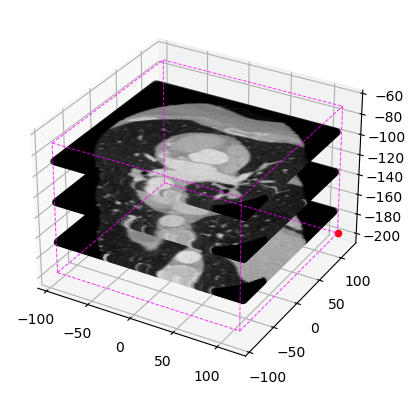

In [26]:
#view an image section in the 3d space with respect to the image bounding box
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
xl, yl, zl = image.bounding_box.get_xlim(), image.bounding_box.get_ylim(), image.bounding_box.get_zlim()
ax.set_xlim([xl[0]-10, xl[1]+10])
ax.set_ylim([yl[0]-10, yl[1]+10])
ax.set_zlim([zl[0]-10, zl[1]+10])
ax.add_artist(image.bounding_box.get_artist())
ax.scatter(image.origin[0], image.origin[1], image.origin[2], c="r")
# get image samples # lower
for zs in [-180, -140, -100]:
  points_to_sample = []
  for xs in range(-110, 110, 2):
    for ys in range(-70, 130, 2):
      points_to_sample.append([xs, ys, zs])
  points_to_sample = np.array(points_to_sample) # N x 3
  samples = image.sample(points_to_sample.T, interpolation="nearest")
  # plot them
  ax.scatter(points_to_sample[:,0], points_to_sample[:,1], points_to_sample[:,2], c=samples, cmap="gray")
plt.show()

In [27]:
#generate volumes
# this function should work but we don't know what to give as input.. so we'll use his function. 
def generate_cubic_volume(voxel_coordinates, patch_size=32):
    """
    Genera un volume cubico a partire dalle coordinate del centro e dalla lunghezza del lato.

    Parameters:
    - voxel_coordinates (tuple or list): Coordinate del centro del cubo (x, y, z).
    - patch_size (float): Lunghezza del lato del cubo.

    Returns:
    - np.ndarray: Volume cubico.
    """
    # Assicurati che le coordinate siano in formato np.ndarray
    voxel_coordinates = np.array(voxel_coordinates)

    # Calcola gli estremi del cubo
    start_point = voxel_coordinates - patch_size / 2
    end_point = voxel_coordinates + patch_size / 2

    # Genera coordinate lungo ciascun asse
    x_coords = np.linspace(start_point[0], end_point[0], num=int(patch_size), endpoint=False)
    y_coords = np.linspace(start_point[1], end_point[1], num=int(patch_size), endpoint=False)
    z_coords = np.linspace(start_point[2], end_point[2], num=int(patch_size), endpoint=False)

    # Genera il cubo utilizzando meshgrid
    x, y, z = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')

    # Restituisci il volume cubico
    return np.stack((x, y, z), axis=-1)

# # Esempio di utilizzo
# center = (0, 0, 0)
# side_length = 5
# cubic_volume = generate_cubic_volume(center, side_length)
# print(cubic_volume.shape)  # Stampa le dimensioni del volume

In [28]:
# extract a cube from the original image
# we have to give as input the center of the cube and the side length
# we basically give the function the center of the ostia in RAS coordinates
# what it does is to convert the RAS coordinates into voxel coordinates
# and then it extracts the cube from the image. 
# the output is a numpy array of shape (32, 32, 32), which is the cube
# we can then plot the cube using matplotlib
# we can also plot the cube in 3d using the function plot_cube


CUBE_SIDE_MM = 12
CUBE_ISOTROPIC_SPACING_MM = 0.3
CUBE_SIDE_N_SAMPLES = int(CUBE_SIDE_MM * (1/CUBE_ISOTROPIC_SPACING_MM)) # you can define this as you prefer, no need to stick to this formula.

def get_cube_sample_points(center: np.ndarray, side_mm: float, n_samples_per_side: int):
    """Sample a cube centered in center with side side, n_samples points."""
    xs = np.linspace(center[0] - side_mm/2, center[0] + side_mm/2, n_samples_per_side)
    ys = np.linspace(center[1] - side_mm/2, center[1] + side_mm/2, n_samples_per_side)
    zs = np.linspace(center[2] - side_mm/2, center[2] + side_mm/2, n_samples_per_side)
    return np.array(np.meshgrid(xs, ys, zs)).reshape(3, -1).T



In [29]:
#these functions are taken from the 'code_example_PW3_sampling_cubes.py'
#we may need them in the future
def cube_samples_to_array(samples: np.ndarray, n_samples_per_side: int) -> np.ndarray:
    """Convert samples from a cube to a numpy array."""
    return samples.reshape(n_samples_per_side, n_samples_per_side, n_samples_per_side)

def cube_samples_to_tensor(samples: np.ndarray, n_samples_per_side: int) -> torch.Tensor:
    """Convert a sampled cube to a graph."""
    return torch.from_numpy(cube_samples_to_array(samples, n_samples_per_side)).float()

def get_input_data_from_vertex_ras_position(
        image: HearticDatasetManager.cat08.Cat08ImageCT|HearticDatasetManager.asoca.AsocaImageCT,
        position: np.ndarray,
        side_mm: float,
        n_samples_per_side: int,
        affine=np.eye(4)
    )-> np.ndarray:
    """Get the input data from a vertex position expressed in RAS coordinates system.

    Parameters
    ----------
    image : HearticDatasetManager.cat08.Cat08ImageCT | HearticDatasetManager.asoca.AsocaImageCT
        The image from which to extract the data.
    position : numpy.ndarray
        The position of the cube center in RAS coordinates system.
    side_mm : float
        The side of the cube in mm.
    n_samples_per_side : int
        The number of samples per side.
    affine : numpy.ndarray, optional
        The affine transformation to apply to the position of the samples used to create the cube, by default numpy.eye(4) (which does nothing).
        This is useful in data augmemtation, if you want to rotate, flip, or do whatever operation
        on the cube sample points, you can do it by passing the affine transformation here.
        For example, HearticDatasetManager.affine.get_affine_3d_rotation_around_vector() will rotate the cube (see the function docs).
    """

In [30]:
#coordinate dell'ostium del grafo
x=g_asoca.nodes[ids[0]]['x'] 
y=g_asoca.nodes[ids[0]]['y']
z=g_asoca.nodes[ids[0]]['z']
ostium_graph_coordinates1 = np.array([x, y, z])
# print(ostium_graph_coordinates1)

xx=g_asoca.nodes[ids[1]]['x'] 
yy=g_asoca.nodes[ids[1]]['y']
zz=g_asoca.nodes[ids[1]]['z']
ostium_graph_coordinates2 = np.array([xx, yy, zz])
# print(ostium_graph_coordinates2)

ostium_ras_coordinates1 = HearticDatasetManager.affine.apply_affine_3d(image.affine_centerlines2ras,ostium_graph_coordinates1)
ostium_ras_coordinates2 = HearticDatasetManager.affine.apply_affine_3d(image.affine_centerlines2ras,ostium_graph_coordinates2)

print("ostium 1 in RAS coordinates: ", ostium_ras_coordinates1)
print("ostium 2 in RAS coordinates: ", ostium_ras_coordinates2)

ostium 1 in RAS coordinates:  [[ 13.18345642]
 [ -1.38864136]
 [-93.45762634]]
ostium 2 in RAS coordinates:  [[  20.46646118]
 [  28.72549438]
 [-104.70037842]]


In [31]:
#get the new coordinates of all of the nodes of the graph
for node_id in g_asoca.nodes:
    old_graph_coords=np.array([g_asoca.nodes[node_id]['x'], g_asoca.nodes[node_id]['y'], g_asoca.nodes[node_id]['z']])
    
    new_graph_coords = HearticDatasetManager.affine.apply_affine_3d(image.affine_centerlines2ras, old_graph_coords)
    g_asoca.nodes[node_id]['x'] = new_graph_coords[0]
    g_asoca.nodes[node_id]['y'] = new_graph_coords[1]
    g_asoca.nodes[node_id]['z'] = new_graph_coords[2]
    

In [32]:
locations= np.array([x,y,z])
x_image = image.sample(locations)
y_image = image.sample(locations)
z_image = image.sample(locations)


print(x_image, y_image, z_image)
print(locations)




-1024.0 -1024.0 -1024.0
[220.41654968 241.38864136 -93.45762634]


In [33]:
cube_samples_pos_ostium = get_cube_sample_points(locations, CUBE_SIDE_MM, CUBE_SIDE_N_SAMPLES)
print(f"cube samples position array shape: {cube_samples_pos_ostium.shape}")
print(cube_samples_pos_ostium)

cube samples position array shape: (64000, 3)
[[214.41654968 235.38864136 -99.45762634]
 [214.41654968 235.38864136 -99.14993404]
 [214.41654968 235.38864136 -98.84224173]
 ...
 [226.41654968 247.38864136 -88.07301096]
 [226.41654968 247.38864136 -87.76531865]
 [226.41654968 247.38864136 -87.45762634]]


In [34]:
# ost=ids[0]
# node=node_id
# dist = g_asoca.get_edge_data(ost,node_id)['euclidean_distance']
# print(f"distance from ostium: {dist}")

In [35]:
#a first try to plot the cube of a random node of the graph
#run it multiple times to see different cubes
node_id = np.random.choice(list(g_asoca.nodes.keys()))
print(f"node id: {node_id}")
# get the position of the node, which is already in RAS since we converted them all
node_position = np.array(
    [g_asoca.nodes[node_id]["x"], g_asoca.nodes[node_id]["y"], g_asoca.nodes[node_id]["z"]]
)

# #distance of the node from the ostium
# distance = np.sqrt((node_position[0]- ostium_ras_coordinates1[0])**2 + (node_position[1]- ostium_ras_coordinates1[1])**2 + (node_position[2]- ostium_ras_coordinates1[2])**2)
# print ("The radius of the ostium is:", radius[0])
# print("The distance from the ostium is:",distance)
# if (distance < radius[0]):
#     print("The node is inside the ostium")
#     label="non_ostium"
# else: 
#     print("The node is outside the ostium")
#     label="ostium"

# move it a bit in a random direction
r = np.random.uniform(0, 2.5644) # or whatever value you want
theta = np.random.uniform(0, 2*np.pi)
phi = np.random.uniform(0, np.pi)
node_position += np.array(
    [r*np.sin(phi)*np.cos(theta), r*np.sin(phi)*np.sin(theta), r*np.cos(phi)]
).reshape(3,1)

#distance of the node from the ostium
distance = np.sqrt((node_position[0]- ostium_ras_coordinates1[0])**2 + (node_position[1]- ostium_ras_coordinates1[1])**2 + (node_position[2]- ostium_ras_coordinates1[2])**2)
print ("The radius of the ostium is:", radius[0])
print("The distance from the ostium is:",distance)
if (distance < radius[0]):
    print("The node is inside the ostium")
    label="non_ostium"
else: 
    print("The node is outside the ostium")
    label="ostium"
    
# now, each voxel of the sampled cube will be sampled at the position shown below
# (the cube is centered in the node position)
cube_samples_position = get_cube_sample_points(node_position, CUBE_SIDE_MM, CUBE_SIDE_N_SAMPLES)
print(f"cube samples position array shape: {cube_samples_position.shape}")




node id: 75
The radius of the ostium is: 2.180273815753563
The distance from the ostium is: [21.08540954]
The node is outside the ostium
cube samples position array shape: (64000, 3)


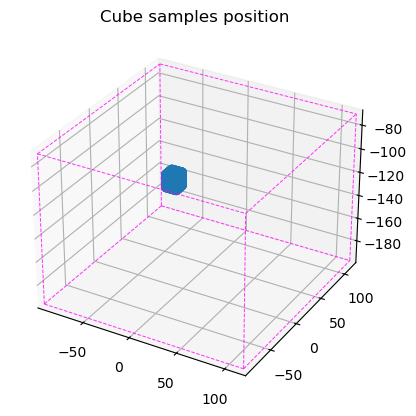

samples shape: (64000,)


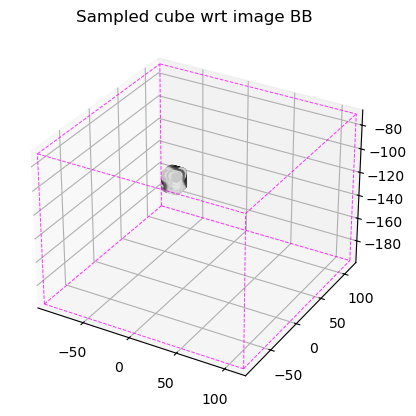

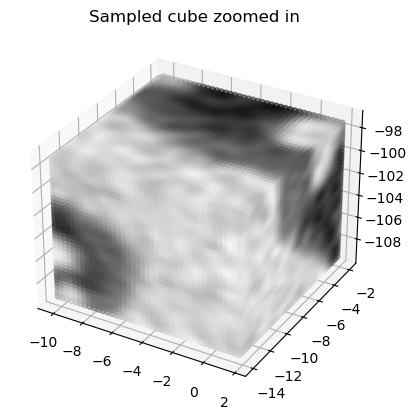

cube array shape: (40, 40, 40)


In [36]:
if 1:
    # plot the cube samples position with respect to the image bounding box
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(image.bounding_box.get_xlim()[0], image.bounding_box.get_xlim()[1])
    ax.set_ylim(image.bounding_box.get_ylim()[0], image.bounding_box.get_ylim()[1])
    ax.set_zlim(image.bounding_box.get_zlim()[0], image.bounding_box.get_zlim()[1])
    ax.set_title("Cube samples position")
    ax.add_artist(image.bounding_box.get_artist())
    ax.scatter(cube_samples_position[:, 0], cube_samples_position[:, 1], cube_samples_position[:, 2])
    plt.show()

# sampling works as follows
samples = image.sample(cube_samples_position.T, interpolation="linear").T
print(f"samples shape: {samples.shape}")
if 1:
    # plot the cube samples position with respect to the image bounding box
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(image.bounding_box.get_xlim()[0], image.bounding_box.get_xlim()[1])
    ax.set_ylim(image.bounding_box.get_ylim()[0], image.bounding_box.get_ylim()[1])
    ax.set_zlim(image.bounding_box.get_zlim()[0], image.bounding_box.get_zlim()[1])
    ax.set_title("Sampled cube wrt image BB")
    ax.add_artist(image.bounding_box.get_artist())
    ax.scatter(cube_samples_position[:, 0], cube_samples_position[:, 1], cube_samples_position[:, 2], c=samples, cmap="gray")
    plt.show()
    # plot the cube samples positions colored with the sampled values
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Sampled cube zoomed in")
    ax.scatter(cube_samples_position[:, 0], cube_samples_position[:, 1], cube_samples_position[:, 2], c=samples, cmap="gray")
    plt.show()
# convert the samples to a numpy array
cube_array = cube_samples_to_array(samples, CUBE_SIDE_N_SAMPLES)
print(f"cube array shape: {cube_array.shape}")


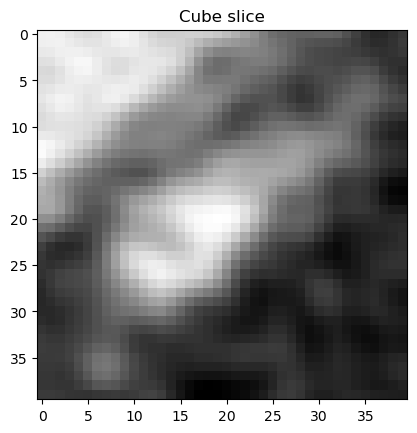

In [37]:
#plot a slice of the cube
if 1:
    plt.imshow(cube_array[:, ::-1, int(CUBE_SIDE_N_SAMPLES/2)], cmap="gray")
    plt.title("Cube slice")
    plt.show()
